In [196]:
class Node:
    def __init__(self, name,workOffset=0):
        self.name = name
        self.parent = []
        self.children = []
        self.visited = False
        self.workTime = ord(name)-64 + workOffset
        self.worked = 0


    
    def __repr__(self) -> str:
        return self.name

    def add_parent(self, parent):
        self.parent.append(parent) 

    def add_children(self, child):
        self.children.append(child) 

    def visit(self):
        self.worked +=1
        if self.workTime == self.worked:
            self.visited = True

In [190]:
import regex as re
with open('input/7.test') as f:
    dat = re.findall('Step (\w{1}).*step (\w{1})',f.read())

# print(dat)

In [191]:
nodes = dict()

for l in dat:
    if l[0] not in nodes.keys():
        nodes[l[0]] = Node(l[0])
    if l[1] not in nodes.keys():
        nodes[l[1]] = Node(l[1])
    nodes[l[1]].add_parent(nodes[l[0]])
    nodes[l[0]].add_children(nodes[l[1]])

print(nodes)

{'C': C, 'A': A, 'F': F, 'B': B, 'D': D, 'E': E}


In [192]:
available = []

for c in nodes.values():
    if(all([i.visited for i in c.parent])):
        available.append(c)
currentNode = nodes[sorted([n.name for n in available])[0]]
available.remove(currentNode)

print(currentNode)
outlist = currentNode.name
for k in range(len(nodes)-1): 
    print(f'current node: {currentNode}')
    currentNode.visit()
    print(f'available: {available}')
    for c in currentNode.children:
        if c not in available:
            available.append(c)
    print(f'extended available: {available}')
    alph = sorted([n.name for n in available])
    for c in alph:
        print(f'checking: {c}')
        print([i.name for i in nodes[c].parent])
        if(all([i.visited for i in nodes[c].parent])):
            outlist = outlist + c
            print(f'GOOD! outlist: {outlist}')
            print(available)
            available.remove(nodes[c])
            currentNode = nodes[c]
            print(f'next node: {currentNode}')
            break
    print('None found!')





C
current node: C
available: []
extended available: [A, F]
checking: A
['C']
GOOD! outlist: CA
[A, F]
next node: A
None found!
current node: A
available: [F]
extended available: [F, B, D]
checking: B
['A']
GOOD! outlist: CAB
[F, B, D]
next node: B
None found!
current node: B
available: [F, D]
extended available: [F, D, E]
checking: D
['A']
GOOD! outlist: CABD
[F, D, E]
next node: D
None found!
current node: D
available: [F, E]
extended available: [F, E]
checking: E
['B', 'D', 'F']
checking: F
['C']
GOOD! outlist: CABDF
[F, E]
next node: F
None found!
current node: F
available: [E]
extended available: [E]
checking: E
['B', 'D', 'F']
GOOD! outlist: CABDFE
[E]
next node: E
None found!


In [193]:
print(f'Problem 1: {outlist}')

Problem 1: CABDFE


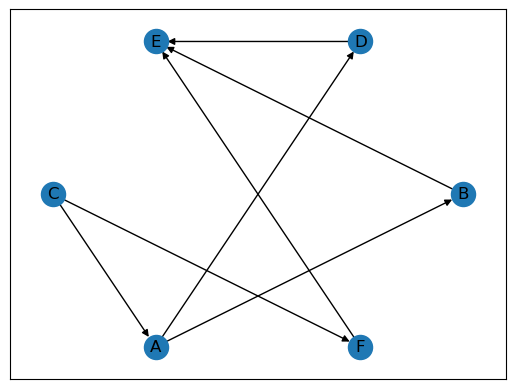

In [194]:
import networkx as nx


G = nx.DiGraph()

for d in dat:
    G.add_edge(d[0],d[1])

import matplotlib.pyplot as plt

nx.draw_networkx(G, pos=nx.shell_layout(G))

plt.show()

In [219]:
#Problem 2

nodes = dict()
workOffset = 0
nElves = 2

for l in dat:
    if l[0] not in nodes.keys():
        nodes[l[0]] = Node(l[0],workOffset)
    if l[1] not in nodes.keys():
        nodes[l[1]] = Node(l[1],workOffset)
    nodes[l[1]].add_parent(nodes[l[0]])
    nodes[l[0]].add_children(nodes[l[1]])

print(nodes)

{'C': C, 'A': A, 'F': F, 'B': B, 'D': D, 'E': E}


In [231]:
available = []
elves = [None for i in range(nElves)]


for c in nodes.values():
    if(all([i.visited for i in c.parent])):
        available.append(c)
        for i in range(nElves):
            if elves[i] is None:
                elves[i] = c
                break
print(available)
print(elves)

for i in range(10):
    for e in elves:
        e.

# currentNode = nodes[sorted([n.name for n in available])[0]]
# available.remove(currentNode)


[None, None]
[C]
[C, None]
